<h1>Suicide Rates Overview 1985 to 2016</h1>

The dataset pulled from a socio-economic info will be used to compare the suicide rates in countries. We'll try to look into the suicide rate of sex, age, country, and year. Afterwards, we'll plot the ranking based from the analyzed data we've accomplished in the notebook. This would help us understand the behavior or the distribution of the suicide rates in the world.

<h3>Python Libraries</h3>

Below are the libraries that will be used for our data analysis and visualization.

In [2]:
# Data analysis and data preparation
import pandas as pd
import numpy as np
import random as rnd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h3>DataFrame</h3>

We first initialized the .csv file inside the Python which will be used for our data analysis.

In [18]:
train_df = pd.read_csv('master.csv')

<h3>Data Analysis</h3>

It is imperative to inspect first the types of data we are dealing with.

In [66]:
train_df.head()

,country,year,sex,age,suicides_no,population,suicides_pop,country-year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [15]:
train_df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [14]:
train_df.shape

(27820, 12)

In [17]:
train_df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [20]:
train_df.nunique()

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k pop      5298
country-year           2321
HDI for year            305
 gdp_for_year ($)      2321
gdp_per_capita ($)     2233
generation                6
dtype: int64

In [22]:
train_df['suicides_no'].unique()

array([  21,   16,   14, ..., 5503, 4359, 2872], dtype=int64)

In [23]:
train_df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


<h3>Data Cleaning</h3>

After inspecting the kind of the data we are dealing with, we will now clean the data based on what we want to find out: suicide rate of sex, age, country, year, and HDI for year. 

In [38]:
train_df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

As seen in the table above, only the HDI for year column contains null values, we'll be removing these values later on to have a better grasp in the dataset. But we'll be removing the unnecessary columns in the dataset: suicidesgdp for year, gdp per capita, and generation.

In [52]:
train_df.rename(columns={"suicides/100k pop":"suicides_pop","HDI for year":"HDI_for_year",
                  " gdp_for_year ($) ":"gdp_for_year"," gdp_per_capita ($) ":"gdp_per_capita",
                    "gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)

suicides_df = train_df.drop(['suicides_pop', 'HDI_for_year','gdp_for_year', 'gdp_per_capita', 'generation'], axis=1)

suicides_df.tail(10)

,country,year,sex,age,suicides_no,population,country-year
27810,Uzbekistan,2014,female,15-24 years,347,2992817,Uzbekistan2014
27811,Uzbekistan,2014,male,55-74 years,144,1271111,Uzbekistan2014
27812,Uzbekistan,2014,male,15-24 years,347,3126905,Uzbekistan2014
27813,Uzbekistan,2014,male,75+ years,17,224995,Uzbekistan2014
27814,Uzbekistan,2014,female,25-34 years,162,2735238,Uzbekistan2014
27815,Uzbekistan,2014,female,35-54 years,107,3620833,Uzbekistan2014
27816,Uzbekistan,2014,female,75+ years,9,348465,Uzbekistan2014
27817,Uzbekistan,2014,male,5-14 years,60,2762158,Uzbekistan2014
27818,Uzbekistan,2014,female,5-14 years,44,2631600,Uzbekistan2014
27819,Uzbekistan,2014,female,55-74 years,21,1438935,Uzbekistan2014


Now that we have removed the unnecessary columns, let's tackle on removing the NaN values.

In [54]:
suicides_df = suicides_df.dropna()
suicides_df.head(10)
suicides_df.isnull().sum()

country         0
year            0
sex             0
age             0
suicides_no     0
population      0
country-year    0
dtype: int64

As you can see, the NaN values have been dropped. Now we can safely say that this data is ready for analysis! Let's try doing one where we want to figure out the suicide no for sex.

In [58]:
suicides_df.groupby('sex').suicides_no.sum()

sex
female    1559510
male      5188910
Name: suicides_no, dtype: int64

Suicide no for age

In [59]:
suicides_df.groupby('age').suicides_no.sum()

age
15-24 years     808542
25-34 years    1123912
35-54 years    2452141
5-14 years       52264
55-74 years    1658443
75+ years       653118
Name: suicides_no, dtype: int64

Suicide no for each country



In [71]:
suicides_df.groupby('country').suicides_no.sum()

country
Albania                    1970
Antigua and Barbuda          11
Argentina                 82219
Armenia                    1905
Aruba                       101
                         ...   
United Arab Emirates        622
United Kingdom           136805
United States           1034013
Uruguay                   13138
Uzbekistan                34803
Name: suicides_no, Length: 101, dtype: int64

Suicide no for years

In [63]:
suicides_df.groupby('year').suicides_no.sum()

year
1985    116063
1986    120670
1987    126842
1988    121026
1989    160244
1990    193361
1991    198020
1992    211473
1993    221565
1994    232063
1995    243544
1996    246725
1997    240745
1998    249591
1999    256119
2000    255832
2001    250652
2002    256095
2003    256079
2004    240861
2005    234375
2006    233361
2007    233408
2008    235447
2009    243487
2010    238702
2011    236484
2012    230160
2013    223199
2014    222984
2015    203640
2016     15603
Name: suicides_no, dtype: int64

Upon first inspection of the data it seems that it is almost five times the female number of suicides for the male number of suicides. As for the age it could be seen that the highest number of suicides occur in ages between 35-54 years. It is still quite unsure for the countries as there are omitted in the presentation. While in the years, surprisingly the number of suicides sharply decreased on 2016, however the most number of suicides occurred during 1999.

<h3>Data Visualization</h3>

We'll represent the above data in a graphical manner to further make sense of the data set and its relationship towards suicide rates

<h4>Comparison between Male and Female Suicide Numbers:</h4>

C:\Users\aboya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aboya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


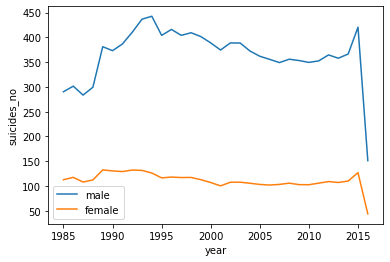

In [84]:
df_male = suicides_df[suicides_df.sex == "male"]
df_female = suicides_df[suicides_df.sex == "female"]
sns.lineplot(df_male.year, suicides_df.suicides_no, ci = None)
sns.lineplot(df_female.year, suicides_df.suicides_no, ci = None)
plt.legend(["male", "female"])

Here we can see the disparity in the suicide numbers for both the females and males, with the former having a lesser number. Moreover, as mentioned previoiusly in 2016 the number sharply decreased, which might be unknown as of the moment.

<h4>Suicide Numbers Across Age Groups</h4>

C:\Users\aboya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='suicides_no'>

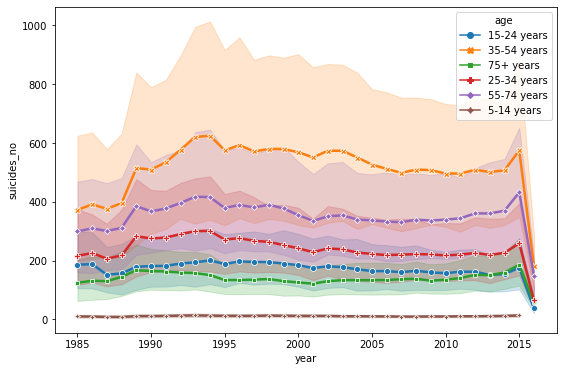

In [98]:
plt.figure(figsize=(9,6))
sns.lineplot("year", suicides_df.suicides_no, hue = "age",
             data = suicides_df, linewidth = 2.5, style = "age", markers=True
            , dashes=False)

As mentioned previously, it seems that it is true for every year that ages 35-54 have the most number of cases of suicides.